In [4]:
store -r

In [5]:
!pip install h2o

    100% |████████████████████████████████| 123.6MB 331kB/s eta 0:00:01 0% |                                | 317kB 49.3MB/s eta 0:00:03    29% |█████████▌                      | 36.7MB 62.2MB/s eta 0:00:02
    100% |████████████████████████████████| 51kB 28.4MB/s ta 0:00:01
    100% |████████████████████████████████| 829kB 20.4MB/s ta 0:00:01
  Running setup.py bdist_wheel for h2o ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/f7/4c/2f/367de2996c0c2621a9e2e19624be0ea0e4b766df3cd597d916
  Running setup.py bdist_wheel for tabulate ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/e1/41/5e/e201f95d90fc84f93aa629b6638adacda680fe63aac47174ab
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/74/bc/50/ae030267a192919b289f84661cfeb5573cf383841c543e8696
Successfully built h2o tabulate future
You are using pip version 10.0.1, however version 19.3 is available.
You should consider upgrading via the 'pip ins

In [6]:
import h2o
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator

In [7]:
h2o.init(max_mem_size = 2) # initializing h2o server
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_152-release"; OpenJDK Runtime Environment (build 1.8.0_152-release-1056-b12); OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)
  Starting server from /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpr1dmfo7x
  JVM stdout: /tmp/tmpr1dmfo7x/h2o_ec2_user_started_from_python.out
  JVM stderr: /tmp/tmpr1dmfo7x/h2o_ec2_user_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.8
H2O cluster version age:,2 days
H2O cluster name:,H2O_from_python_ec2_user_2ernvv
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [9]:
creditData_df = h2o.import_file(r"data/creditcard.csv") 

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [11]:
features= creditData_df.drop(['Time'], axis=1)
train, test = features.split_frame([0.8])

In [12]:
# converting to pandas dataframe
train_df = train.as_data_frame()
test_df = test.as_data_frame()
train_df = train_df[train_df['Class'] == 0]
# drop the Class variable
train_df = train_df.drop(['Class'], axis=1)
Y_test_df = test_df['Class'] # true labels of the testing set
test_df = test_df.drop(['Class'], axis=1)

In [13]:
train_h2o = h2o.H2OFrame(train_df) # converting to h2o frame
test_h2o = h2o.H2OFrame(test_df)
train_cols = train_h2o.columns

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [14]:
anomaly_model = H2ODeepLearningEstimator(activation = "Tanh",
                               hidden = [14,7,7,14],
                               epochs = 100,
                               standardize = True,
                                stopping_metric = 'MSE', 
                                loss = 'automatic',
                                train_samples_per_iteration = 32,
                                shuffle_training_data = True,     
                               autoencoder = True,
                               l1 = 10e-5)
anomaly_model.train(x=train_cols, training_frame = train_h2o)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [15]:
anomaly_model._model_json['output']['variable_importances'].as_data_frame()

,variable,relative_importance,scaled_importance,percentage
0,V11,1.000000,1.000000,0.151405
1,V15,0.947039,0.947039,0.143387
2,V18,0.942521,0.942521,0.142703
3,V19,0.927659,0.927659,0.140453
4,V24,0.914340,0.914340,0.138436
5,V26,0.907737,0.907737,0.137436
6,V13,0.894613,0.894613,0.135449
7,V9,0.040351,0.040351,0.006109
8,V4,0.006996,0.006996,0.001059
9,V12,0.006825,0.006825,0.001033


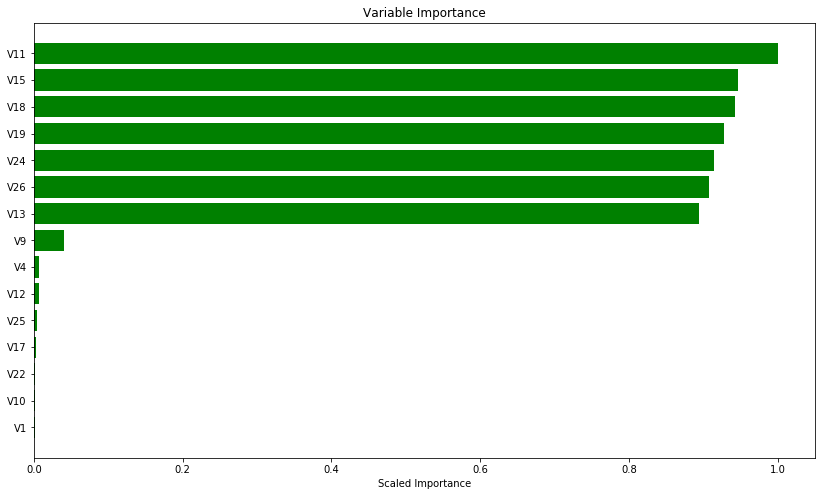

In [16]:
# plotting the variable importance
rcParams['figure.figsize'] = 14, 8
#plt.rcdefaults()
fig, ax = plt.subplots()

variables = anomaly_model._model_json['output']['variable_importances']['variable']
var = variables[0:15]
y_pos = np.arange(len(var))

scaled_importance = anomaly_model._model_json['output']['variable_importances']['scaled_importance']
sc = scaled_importance[0:15]

ax.barh(y_pos, sc, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

Text(0.5, 0, 'epoch')

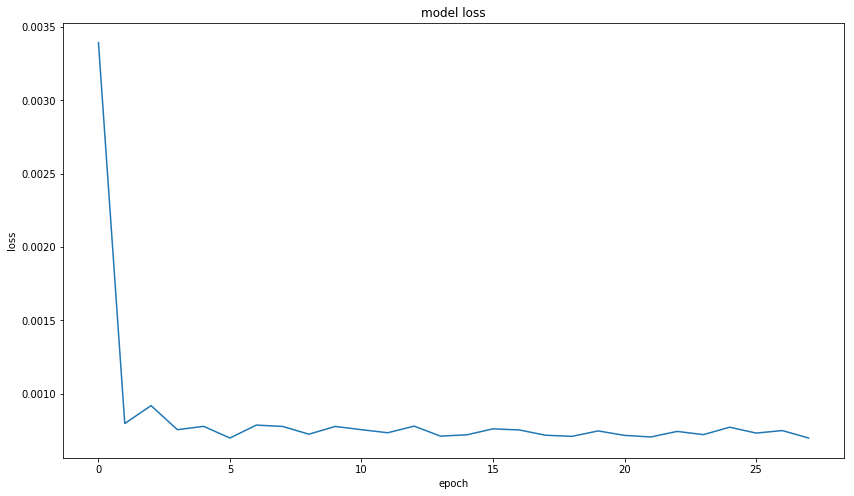

In [17]:
# plotting the loss
scoring_history = anomaly_model.score_history()
%matplotlib inline
rcParams['figure.figsize'] = 14, 8
plt.plot(scoring_history['training_mse'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

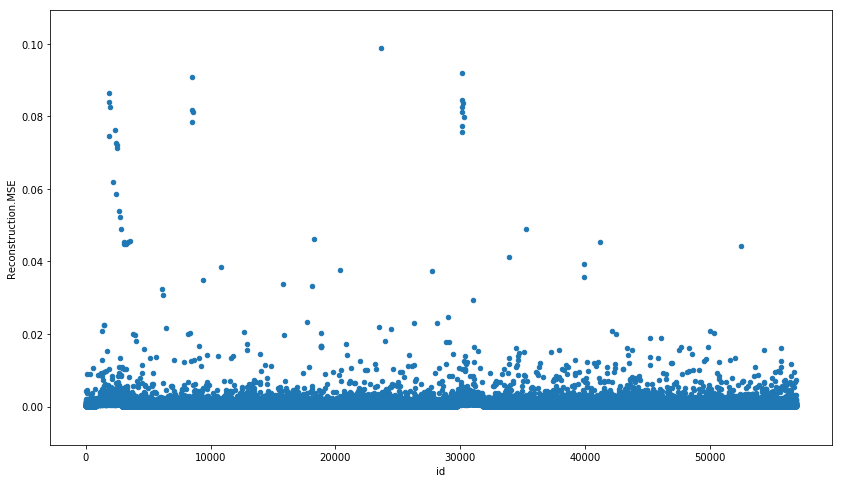

In [18]:
test_rec_error = anomaly_model.anomaly(test_h2o) 
# anomaly is a H2O function which calculates the error for the dataset
# converting to pandas dataframe
test_rec_error_df = test_rec_error.as_data_frame()
# plotting the testing dataset against the error
test_rec_error_df['id']=test_rec_error_df.index
rcParams['figure.figsize'] = 14, 8
test_rec_error_df.plot(kind="scatter", x='id', y="Reconstruction.MSE")
plt.show()

In [19]:
# predicting the class for the testing dataset
predictions = anomaly_model.predict(test_h2o)
error_df = pd.DataFrame({'reconstruction_error': test_rec_error_df['Reconstruction.MSE'],
                        'true_class': Y_test_df})
error_df.describe()

deeplearning prediction progress: |███████████████████████████████████████| 100%


,reconstruction_error,true_class
count,56935.000000,56935.000000
mean,0.000751,0.001528
std,0.002068,0.039061
min,0.000038,0.000000
25%,0.000273,0.000000
50%,0.000433,0.000000
75%,0.000829,0.000000
max,0.098761,1.000000


In [20]:
error_df

,reconstruction_error,true_class
0,0.000183,0
1,0.001005,0
2,0.000372,0
3,0.001161,0
4,0.000792,0
5,0.000421,0
6,0.000146,0
7,0.000102,0
8,0.001442,0
9,0.000241,0


In [24]:
error_df[error_df['true_class'] == 1].count()

reconstruction_error    87
true_class              87
dtype: int64

In [56]:
score_mean = error_df['reconstruction_error'].mean()
score_std = error_df['reconstruction_error'].std()
score_cutoff = score_mean + 3*score_std
score_cutoff

0.006953525974170127

In [60]:
error_df[(error_df['true_class'] == 1) & error_df['reconstruction_error'] > 0.002].count()

reconstruction_error    87
true_class              87
dtype: int64

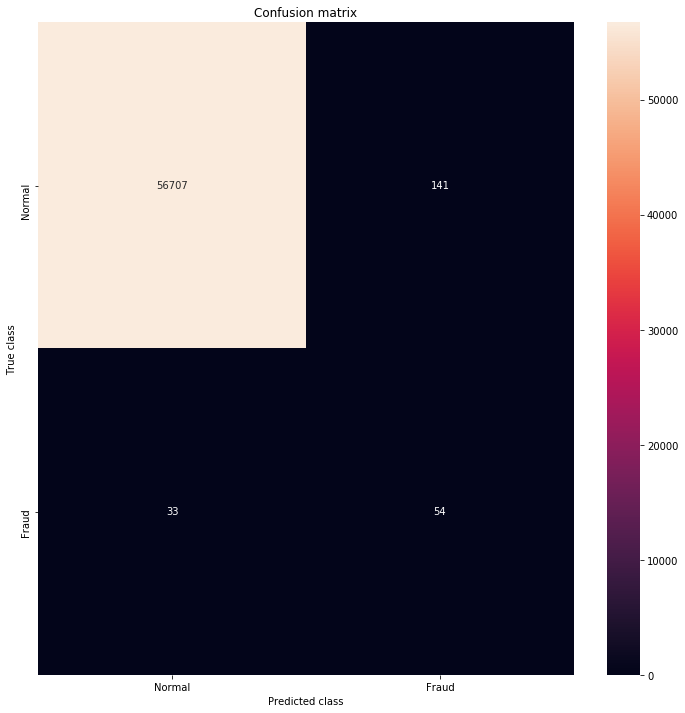

In [38]:
import seaborn as sns
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
threshold = 0.01
LABELS = ['Normal', 'Fraud']
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [54]:
features['Class'][features['Class'] == 1].as_data_frame().count()

Class    492
dtype: int64